<a href="https://colab.research.google.com/github/JayNguyen-123/Convolutional_Neural_Network-CNN_in_Pytorch/blob/main/Convolutional_Neural_Network(CNN)_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simple Convolution Neural Network(CNN)
- We’ll use the MNIST dataset, a collection of handwritten digits, to train our model today.
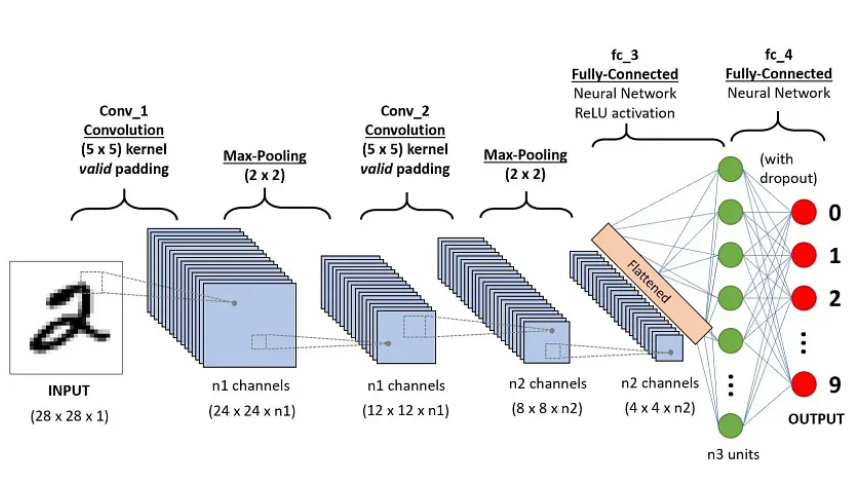

In [ ]:
# Import some required library
import torch
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm


### Define our CNN
- Define the layers of the convolutional neural network.

        Parameters:
            in_channels: int
                The number of channels in the input image. For MNIST, this is 1 (grayscale images).
            num_classes: int
                The number of classes we want to predict, in our case 10 (digits 0 to 9).
        

In [ ]:
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes=10):

    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

  def forward(self, x):
    x = F.relu(self.conv1(x)) # apply the 1st conv and Relu activation
    x = self.pool(x)  # apply max pooling
    x = F.relu(self.conv2(x))  # apply the 2nd conv and Relu activation
    x = self.pool(x)  # apply max pooling
    x = x.reshape(x.shape[0], -1)  # flatten the tensor
    x = self.fc1(x)   # apply fully connected layer
    return x



### Set up Device
- PyTorch can run on both CPUs and GPUs. We’ll set up the device to use a GPU if available; otherwise, we’ll use a CPU.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


### Define Hyperparameters
- Hyperparameters are configuration settings used to tune how the model is trained.

In [ ]:
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

### Load Data
- Hyperparameters are configuration settings used to tune how the model is trained.

In [ ]:
train_dataset = datasets.MNIST(
    root="dataset/",
    download=True,
    train=True,
    transform=transforms.ToTensor()
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/",
                              download=True,
                              train=False,
                              transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


### Initialize the Network
- Instantiate our neural network and move it to the device (GPU or CPU).

In [ ]:
model = CNN(in_channels=1, num_classes=num_classes).to(device)


### Define the Loss and Optimizer
-We’ll use cross-entropy loss for classification and the Adam optimizer to update the model’s weights.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


### Training the Neetwork

In [ ]:
for epoch in range(num_epochs):
  print(f"Epoch [{epoch + 1}/{num_epochs}]")
  for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
    # move data and target to the device(GPU/CPU)
    data = data.to(device)
    targets = targets.to(device)

    # forward pass: compute the model output
    scores = model(data)
    loss = criterion(scores, targets)

    # backward pass: compute the gradients
    optimizer.zero_grad()
    loss.backward()

    # optimizer step: update the model parameters
    optimizer.step()



Epoch [1/10]


100%|██████████| 938/938 [00:23<00:00, 40.30it/s]


Epoch [2/10]


100%|██████████| 938/938 [00:22<00:00, 41.77it/s]


Epoch [3/10]


100%|██████████| 938/938 [00:22<00:00, 40.95it/s]


Epoch [4/10]


100%|██████████| 938/938 [00:22<00:00, 41.04it/s]


Epoch [5/10]


100%|██████████| 938/938 [00:21<00:00, 43.17it/s]


Epoch [6/10]


100%|██████████| 938/938 [00:22<00:00, 41.08it/s]


Epoch [7/10]


100%|██████████| 938/938 [00:22<00:00, 41.07it/s]


Epoch [8/10]


100%|██████████| 938/938 [00:21<00:00, 43.32it/s]


Epoch [9/10]


100%|██████████| 938/938 [00:22<00:00, 40.98it/s]


Epoch [10/10]


100%|██████████| 938/938 [00:22<00:00, 40.97it/s]


### Check Accuracy
- Checks the accuracy of the model on the given dataset loader.

    Parameters:
        loader: DataLoader
            The DataLoader for the dataset to check accuracy on.
        model: nn.Module
            The neural network model.

In [ ]:
def check_accuracy(loader, model):
  if loader.dataset.train:
    print("Checking accuracy on training data")
  else:
    print("Checking accuracy on test data")

  num_correct = 0
  num_samples = 0
  model.eval()    # set the model to evaluation mode

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)

      # forward pass: compute the model ouput
      scores = model(x)
      _, predictions = scores.max(1)   # get the index of the max log-probability
      num_correct += (predictions == y).sum()  # count correct predictions
      num_samples += predictions.size(0)  # count the samples

    # calculate accuracy
    accuracy = float(num_correct) / float(num_samples) * 100
    print(f"Got {num_correct} / {num_samples} with accuracy {accuracy:.2f}%")
  model.train()  # set the model back to training mode

# final accuracy check on the training back to test sets
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)





Checking accuracy on training data
Got 59420 / 60000 with accuracy 99.03%
Checking accuracy on test data
Got 9851 / 10000 with accuracy 98.51%
